In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

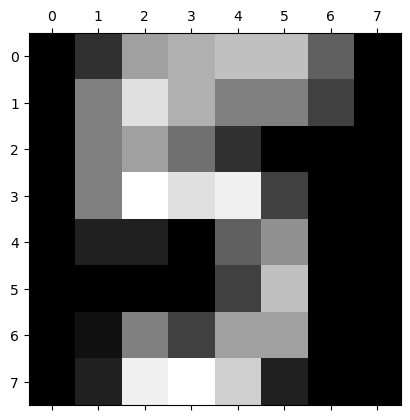

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1003])
plt.show()

In [6]:
vectors = np.array(vectors)

In [7]:
vectors.shape

(6000, 784)

In [8]:
chars=np.array(chars)

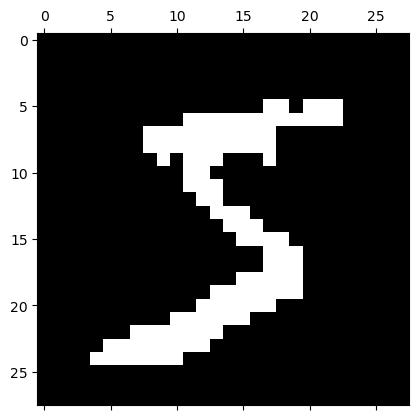

5


In [9]:
plt.matshow(vectors[0].reshape(28,28))
plt.show()
print(chars[0])

# KNN

#### MNIST

In [36]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [37]:
X_train.shape

(4800, 784)

In [38]:
X_test.shape

(1200, 784)

In [28]:
def predict(Xtrain,train_labels,test_point,k):
    X_train=Xtrain.copy()
    for i in range(X_train.shape[1]):
        X_train[:,i]=X_train[:,i].astype(float)-test_point[i]
    distances = np.linalg.norm(X_train, axis=1)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_neighbors=nearest_neighbors.astype(int)
    closets_neigh=train_labels[nearest_neighbors]
    return st.mode(closets_neigh)[0][0]

In [41]:
"""
embedding = PCA(n_components=2)#, normalized_stress='auto')
X_transformed_train = embedding.fit_transform(X_train)
X_transformed_train = np.vstack((X_transformed_train.T, y_train)).T
X_transformed_test = embedding.fit_transform(X_test)
"""
def test(k):
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict(X_train,y_train,X_test[e],k)
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

valor_k=[1,2,3,4,5,10,50,100,150,200,500,1000]
yaccuracy_k=[]
for k in valor_k:
    print(k)
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)




1


C:\Users\afrincon\AppData\Local\Temp\ipykernel_17076\2953966927.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_17076\2953966927.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see ht

2
3
4
5
10
50
100
150
200
500
1000


valor de k:  1 , accuracy:  0.9325
valor de k:  2 , accuracy:  0.9116666666666666
valor de k:  3 , accuracy:  0.925
valor de k:  4 , accuracy:  0.9225
valor de k:  5 , accuracy:  0.9208333333333333
valor de k:  10 , accuracy:  0.9116666666666666
valor de k:  50 , accuracy:  0.865
valor de k:  100 , accuracy:  0.825
valor de k:  150 , accuracy:  0.7908333333333334
valor de k:  200 , accuracy:  0.7625
valor de k:  500 , accuracy:  0.6641666666666667
valor de k:  1000 , accuracy:  0.5525


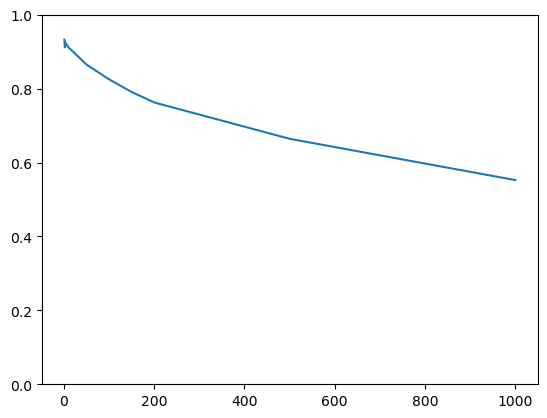

In [42]:
valor_k=np.array([1,2,3,4,5,10,50,100,150,200,500,1000])
for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.ylim(0,1)
plt.show()

#### DIGITS

In [31]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [29]:
digits["data"].shape

(1797, 64)

In [30]:
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(digits['data'] ,digits["target"],test_size=0.20, random_state=42)

In [40]:
""""
standardized_data_train = MinMaxScaler().fit_transform(X_train_digits)
standardized_data_test = MinMaxScaler().fit_transform(X_test_digits)
#(1797, 64)
embedding = MDS(n_components=2)#, normalized_stress='auto')
X_transformed_train_digits = embedding.fit_transform(standardized_data_train)

X_transformed_train_digits = np.vstack((X_transformed_train_digits.T, y_train_digits)).T
X_transformed_test_digits = embedding.fit_transform(standardized_data_test)
"""

def test(k):
    success = 0
    examples = X_test_digits
    for e in range(len(examples)):
        z = predict(X_train_digits,y_train_digits,X_test_digits[e],k)
        if z == y_test_digits[e]:
            success += 1
    return float(success) / len(examples)

valor_k=np.arange(1,200,1)
yaccuracy_k=[]
for k in valor_k:
    print(k)
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)

1


C:\Users\afrincon\AppData\Local\Temp\ipykernel_17076\2953966927.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


valor de k:  1 , accuracy:  0.8916666666666667
valor de k:  2 , accuracy:  0.875
valor de k:  3 , accuracy:  0.9111111111111111
valor de k:  4 , accuracy:  0.9194444444444444
valor de k:  5 , accuracy:  0.9111111111111111
valor de k:  6 , accuracy:  0.9055555555555556
valor de k:  7 , accuracy:  0.925
valor de k:  8 , accuracy:  0.9083333333333333
valor de k:  9 , accuracy:  0.9166666666666666
valor de k:  10 , accuracy:  0.9166666666666666
valor de k:  11 , accuracy:  0.9055555555555556
valor de k:  12 , accuracy:  0.9083333333333333
valor de k:  13 , accuracy:  0.9055555555555556
valor de k:  14 , accuracy:  0.9
valor de k:  15 , accuracy:  0.8972222222222223
valor de k:  16 , accuracy:  0.8972222222222223
valor de k:  17 , accuracy:  0.8944444444444445
valor de k:  18 , accuracy:  0.9
valor de k:  19 , accuracy:  0.9111111111111111
valor de k:  20 , accuracy:  0.9111111111111111
valor de k:  21 , accuracy:  0.9083333333333333
valor de k:  22 , accuracy:  0.9055555555555556
valor de 

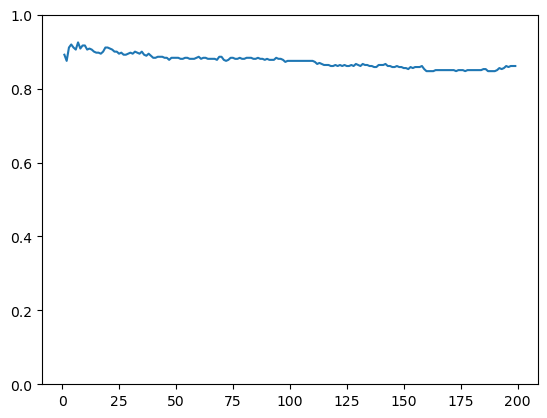

In [35]:
valor_k=np.array(valor_k)
for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.ylim(0,1)
plt.show()

## Prostate

In [53]:
import pandas as pd

In [54]:
prostate_data = pd.read_csv('prostate.csv')
prostate_data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [55]:
prostate_data["svi"].value_counts()

0    76
1    21
Name: svi, dtype: int64

In [56]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.
Prostate_train, Prostate_test = train_test_split(prostate_data,test_size=0.20, random_state=42)

In [57]:
def predict(Xtrain,train_labels,test_point,k):
    X_train=Xtrain.copy()
    for i in range(X_train.shape[1]):
        X_train[:,i]=X_train[:,i].astype(float)-test_point[i]
    distances = np.linalg.norm(X_train, axis=1)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_neighbors=nearest_neighbors.astype(int)
    closets_neigh=train_labels[nearest_neighbors]
    return st.mode(closets_neigh)[0][0]

In [58]:
X_train_label=Prostate_train["svi"]
X_train=Prostate_train.drop(columns=["svi"])
X_test_label=Prostate_test["svi"]
X_test=Prostate_test.drop(columns=["svi"])


In [59]:
def test(k):
    success = 0
    examples = X_test.values
    for e in range(len(examples)):
        z = predict(X_train.values,X_train_label.values,X_test.values[e],k)
        if z == X_test_label.values[e]:
            success += 1
    return float(success) / len(examples)

valor_k=np.arange(1,100,1)
yaccuracy_k=[]
for k in valor_k:
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)

C:\Users\afrincon\AppData\Local\Temp\ipykernel_17076\2953966927.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]


valor de k:  1 , accuracy:  0.7
valor de k:  2 , accuracy:  0.75
valor de k:  3 , accuracy:  0.75
valor de k:  4 , accuracy:  0.7
valor de k:  5 , accuracy:  0.65
valor de k:  6 , accuracy:  0.7
valor de k:  7 , accuracy:  0.75
valor de k:  8 , accuracy:  0.7
valor de k:  9 , accuracy:  0.65
valor de k:  10 , accuracy:  0.7
valor de k:  11 , accuracy:  0.7
valor de k:  12 , accuracy:  0.7
valor de k:  13 , accuracy:  0.7
valor de k:  14 , accuracy:  0.8
valor de k:  15 , accuracy:  0.8
valor de k:  16 , accuracy:  0.8
valor de k:  17 , accuracy:  0.8
valor de k:  18 , accuracy:  0.8
valor de k:  19 , accuracy:  0.8
valor de k:  20 , accuracy:  0.8
valor de k:  21 , accuracy:  0.65
valor de k:  22 , accuracy:  0.8
valor de k:  23 , accuracy:  0.8
valor de k:  24 , accuracy:  0.8
valor de k:  25 , accuracy:  0.9
valor de k:  26 , accuracy:  0.85
valor de k:  27 , accuracy:  0.75
valor de k:  28 , accuracy:  0.8
valor de k:  29 , accuracy:  0.75
valor de k:  30 , accuracy:  0.8
valor de k

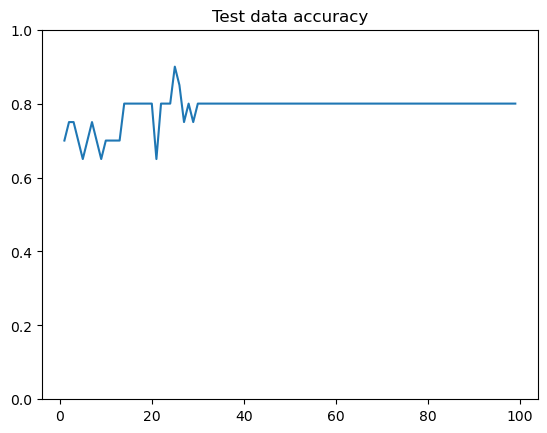

In [60]:

for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.title("Test data accuracy")
plt.ylim(0,1)
plt.show()

In [61]:
def test(k):
    success = 0
    examples = X_train.values
    for e in range(len(examples)):
        z = predict(X_train.values,X_train_label.values,X_train.values[e],k)
        if z == X_train_label.values[e]:
            success += 1
    return float(success) / len(examples)

valor_k=np.arange(1,100,1)
yaccuracy_k=[]
for k in valor_k:
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)

C:\Users\afrincon\AppData\Local\Temp\ipykernel_17076\2953966927.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]


valor de k:  1 , accuracy:  1.0
valor de k:  2 , accuracy:  0.8701298701298701
valor de k:  3 , accuracy:  0.8571428571428571
valor de k:  4 , accuracy:  0.8571428571428571
valor de k:  5 , accuracy:  0.8571428571428571
valor de k:  6 , accuracy:  0.8311688311688312
valor de k:  7 , accuracy:  0.8051948051948052
valor de k:  8 , accuracy:  0.8441558441558441
valor de k:  9 , accuracy:  0.8181818181818182
valor de k:  10 , accuracy:  0.8311688311688312
valor de k:  11 , accuracy:  0.8051948051948052
valor de k:  12 , accuracy:  0.7792207792207793
valor de k:  13 , accuracy:  0.8051948051948052
valor de k:  14 , accuracy:  0.7922077922077922
valor de k:  15 , accuracy:  0.7792207792207793
valor de k:  16 , accuracy:  0.7792207792207793
valor de k:  17 , accuracy:  0.7662337662337663
valor de k:  18 , accuracy:  0.7792207792207793
valor de k:  19 , accuracy:  0.7792207792207793
valor de k:  20 , accuracy:  0.7792207792207793
valor de k:  21 , accuracy:  0.7662337662337663
valor de k:  22 

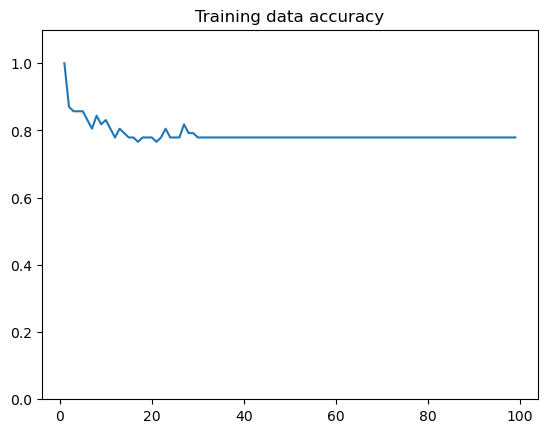

In [66]:

for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.title("Training data accuracy")
plt.ylim(0,1.1)
plt.show()

# Perceptron

In [63]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [64]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

IndentationError: expected an indented block (2579002564.py, line 10)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)